In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/DibeatesePrediction/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Check for missing values
print(df.isnull().sum())

# Splitting features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



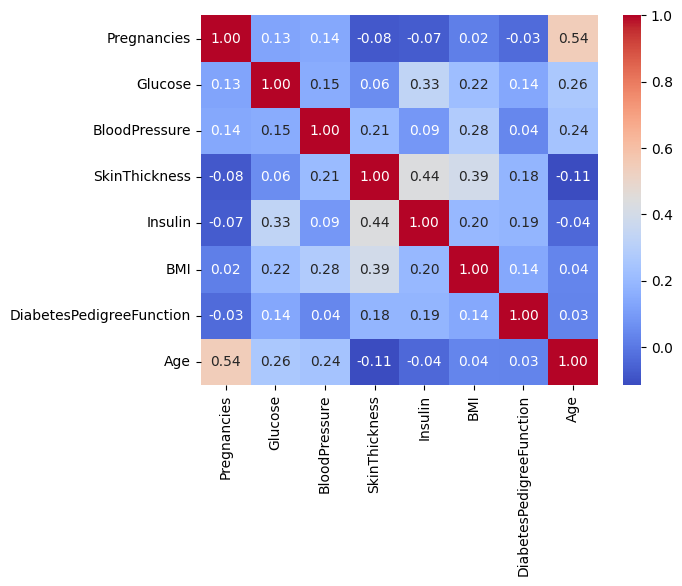

In [9]:
# Check for correlation
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

print(selector.support_)  # Shows selected features
print(selector.ranking_)  # Shows ranking of features


[False  True  True False False  True  True  True]
[2 1 1 4 3 1 1 1]


In [11]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Accuracy: 0.7077922077922078


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=25, validation_data=(X_test, y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4575 - loss: 0.7197 - val_accuracy: 0.5519 - val_loss: 0.6769
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6445 - loss: 0.6540 - val_accuracy: 0.6623 - val_loss: 0.6369
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6869 - loss: 0.6169 - val_accuracy: 0.7013 - val_loss: 0.6058
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7057 - loss: 0.5796 - val_accuracy: 0.7208 - val_loss: 0.5797
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7297 - loss: 0.5508 - val_accuracy: 0.7208 - val_loss: 0.5584
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7283 - loss: 0.5469 - val_accuracy: 0.7468 - val_loss: 0.5401
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7203 - loss: 0.5131 - val_accuracy: 0.7532 - val_loss: 0.5285
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7555 - loss: 0.4969 - val_accuracy: 0.7597 - val_los

In [18]:
features = ['Glucose', 'BMI', 'Insulin', 'Age']

In [19]:
X = df[features]  # Features
y = df['Outcome']  # Target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.60      0.59        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train a Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')


Logistic Regression Accuracy: 73.59%


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 71.43%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')


KNN Accuracy: 67.97%


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train a Support Vector Classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')


SVM Accuracy: 73.16%


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%')


Gradient Boosting Accuracy: 74.89%


In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and train an XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')


XGBoost Accuracy: 70.13%


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train a Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_nb = nb_clf.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')


Naive Bayes Accuracy: 74.03%


In [33]:
import joblib

# Save the trained model
joblib.dump(nb_clf, 'diabetes_prediction_model.joblib')


['diabetes_prediction_model.joblib']

In [34]:
import shutil

# Move the model to a downloadable location (if needed)
shutil.move('diabetes_prediction_model.joblib', '/content/drive/MyDrive/ML/DibeatesePrediction/diabetes_prediction_model.joblib')

# Provide a download link
from google.colab import files
files.download('/content/drive/MyDrive/ML/DibeatesePrediction/diabetes_prediction_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>